# Doing Business and GDP - Data Preparation

### Content:
1. Introduction
2. Data pre-processing:  
    2.1. *Doing Business*  
    2.2. *GDP Data*  
    2.3. *GDP Growth Rate*  
    2.4. *GDP/Capita*
5. Summary
6. References

Using artist layer

### 1. Introduction:
* In this notebook we will use python to pre-process data.  
* We will focus on three different indicators that we will use for analysis in the future.  
* Some visualization will be provided for each data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', None)

### 2. Data pre-processing:

#### 2.1. Doing Business:
The first dataframe we will pre-process will be The World Bank's *__Doing Business__* indicators.

#### 2.1.1. Loading and pre-processing *Region* data:
We start by loading the metadata so we can extract the *__Region__* data from it.

In [2]:
# Load metadata:
metadata_raw = pd.read_csv('Doing_Business_Metadata.csv')

metadata_raw.head(2)

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",NaN,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2011,"Demographic and Health Survey, 2017/18",NaN,...,Enhanced General Data Dissemination System (e-...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,AL,AL,Albania,Albania


In [3]:
# Create new "Region" dataframe:
country_regions = metadata_raw.copy()

# Keep columns of interest:
keep_columns1 = ['Short Name', 'Region',]
country_regions = country_regions[keep_columns1]

# Rename columns:
country_regions.rename(columns = {'Short Name' : 'Country'}, inplace = True)

country_regions.head()

,Country,Region
0,Afghanistan,South Asia
1,Albania,Europe & Central Asia
2,Algeria,Middle East & North Africa
3,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,Latin America & Caribbean


In [4]:
print(\
'Region values have been set for {} countries.'\
      .format(country_regions.shape[0])
     )

Region values have been set for 191 countries.


#### 2.1.2. Loading and processing *Doing Business* data:

In [5]:
# Load "Doing Business" data:
doing_business_raw = pd.read_csv('Doing_business_indicators.csv')

doing_business_raw.head(2)

,Economy Name,Economy Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Starting a business - Score,IC.REG.STRT.BUS.DFRN,90.35477,82.55461,92.04130,91.99116
1,Afghanistan,AFG,Global: Ease of doing business score (DB17-20 ...,IC.BUS.EASE.DFRN.XQ.DB1719,38.93563,37.13062,44.20343,44.06497


In [6]:
# Create new "Doing Business" dataframe:
doing_business = doing_business_raw.copy()

# Keep columns of interest:
keep_columns2 = ['Economy Name', 'Series Name', '2020 [YR2020]']
doing_business = doing_business[keep_columns2]

# Rename columns:
doing_business.rename(columns = {'2020 [YR2020]':'Values'}, inplace = True)

doing_business.head(8)

,Economy Name,Series Name,Values
0,Afghanistan,Starting a business - Score,91.99116
1,Afghanistan,Global: Ease of doing business score (DB17-20 ...,44.06497
2,Afghanistan,Enforcing contracts (DB17-20 methodology) - Score,31.75645
3,Afghanistan,Getting Credit total score (DB15-20 methodology),10.00000
4,Albania,Starting a business - Score,91.75909
5,Albania,Global: Ease of doing business score (DB17-20 ...,67.74847
6,Albania,Enforcing contracts (DB17-20 methodology) - Score,53.51698
7,Albania,Getting Credit total score (DB15-20 methodology),14.00000


Our dataframe has 4 rows for each country including values for each of the *__Doing Business__* indicators.  
These indicators include:
1. *__Ease of doing business__* - a simple average of the Doing Business scores.
2. *__Starting a business__* - the ease of starting a business by an entrepreneur.
3. *__Enforcing contracts__* - the time and cost of resolving commercial disputes.
4. *__Getting credit__* - strength of legal rights index and the depth of credit information index.

Before we move on, let's check if there are any null values in our dataframe.

In [7]:
print(\
'There are {} NaN values in the "doing_business" dataframe.'\
      .format(doing_business['Values'].isnull().values.sum())
     )

There are 0 NaN values in the "doing_business" dataframe.


There are no null values in our dataframe, we can continue with the pre-processing.

Before we can continue we must pivot our data and aggregate by *__Country__*.

In [8]:
# Pivot so each country has one row and a column for each indicator:
doing_business = doing_business.pivot(index = 'Economy Name', columns = 'Series Name', values = 'Values')
doing_business.reset_index(inplace = True)

# Rename columns:
old_columns = doing_business.columns
new_columns = ['Country', 'Enforcing Contracts', 'Getting Credit','Ease of Doing Business', 'Starting a Business' ]

# Replace old column names by new column names:
for i, old_name in enumerate(old_columns):
    doing_business.rename(columns = {old_name : new_columns[i]}, inplace = True)

# Set the columns order:
new_column_order = ['Country','Getting Credit', 'Enforcing Contracts', 'Starting a Business','Ease of Doing Business']
doing_business = doing_business[new_column_order]


doing_business.head()

Series Name,Country,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business
0,Afghanistan,10.0,31.75645,91.99116,44.06497
1,Albania,14.0,53.51698,91.75909,67.74847
2,Algeria,2.0,54.78094,78.01386,48.59758
3,Angola,1.0,28.11028,79.40060,41.28838
4,Antigua and Barbuda,5.0,68.11245,82.58503,60.28342


In [9]:
# Check summary statistics:
doing_business.describe()

Series Name,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business
count,191.000000,191.000000,191.000000,191.000000
mean,10.895288,56.324697,84.366592,63.051417
std,4.830771,13.391194,11.251611,13.860445
min,0.000000,6.132360,25.000000,20.039580
25%,7.500000,48.556250,80.024565,54.359165
50%,11.000000,57.534930,86.973880,62.829430
75%,14.000000,65.751250,92.278120,74.341020
max,20.000000,84.531890,99.975440,86.764650


In [10]:
print(\
      'The "doing_business" datafram has data on {} indicators for {} counrties'\
      .format((doing_business.shape[1]-1), doing_business.shape[0])
     )

The "doing_business" datafram has data on 4 indicators for 191 counrties


#### 2.1.3. A few quick notes on the *Doing Business* descriptive statistics:
* Overall, we have data on 4 *__Doing Business__* indicators for 191 countries.  
* We can see that *__Getting credit__* has the lowest values but relativly high standard deviation.  
* Other than that, we learn that *__Starting a Business__* indicator has the highest values and relativly low standard deviation and a high mean.

#### 2.1.4. Visualizing Data - China and United States:

Let's create a bar chart of the *__Doing Business__* indicators showing China and The United States side by side.  

#### 2.1.4.1. *get_row_values()* function:
This function will help us extract data quickly for a chosen country.

In [11]:
def get_row_values (dataframe, search_column, search_value):
    '''
    Search a clolumn in a dataframe for a value and
    return that value's row from the dataframe.
    (Sets the "search_column" as the index)
    '''
    # Find and store the requested row:
    row_values = dataframe[dataframe[search_column] == search_value]
    
    # Set the "search_column" as the index:
    row_values = row_values.set_index(search_column)
    
    return row_values

#### 2.1.4.2. Visualization data preparation:

In [12]:
# China data:
china_indicators = get_row_values(doing_business, 'Country', 'China')

# United States data:
usa_indicators = get_row_values(doing_business, 'Country', 'United States')

# Combined data:
china_usa_indicators = pd.DataFrame()
china_usa_indicators = china_usa_indicators.append(china_indicators)
china_usa_indicators = china_usa_indicators.append(usa_indicators)

# Reset index and change column names:
china_usa_indicators = china_usa_indicators.transpose().reset_index()
china_usa_indicators = china_usa_indicators.rename(columns = {'Series Name': ''}).set_index('')


china_usa_indicators

Country,China,United States
,,
Getting Credit,12.00000,19.00000
Enforcing Contracts,80.91292,73.43767
Starting a Business,94.09210,91.59317
Ease of Doing Business,77.93130,83.99668


#### 2.1.4.3. Visualization:

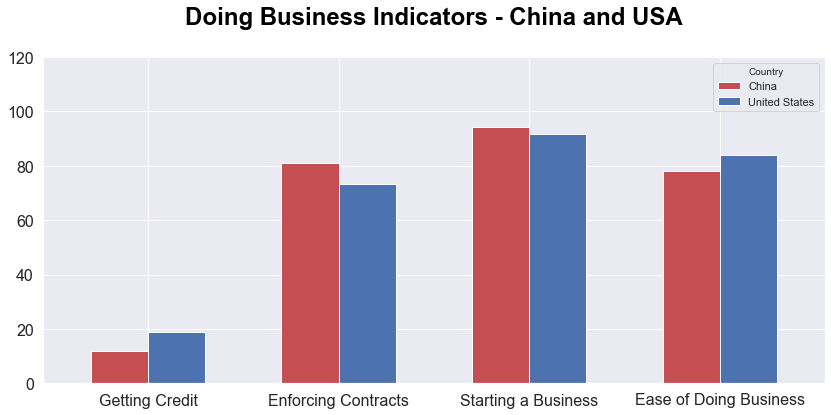

In [13]:
fig_china_usa = plt.figure() # create figure

indicator_list = china_usa_indicators.index

ax_china_usa = fig_china_usa.add_subplot(1,1,1)

ax_china_usa = china_usa_indicators.plot(
    kind='bar',
    width = 0.6,
    fontsize = 16,
    color = ['r', 'b'],
    figsize = (14, 6),
    ax = ax_china_usa)


ax_china_usa.set_title('Doing Business Indicators - China and USA\n',
                       fontsize = 24,
                       color = 'black',
                       fontweight = 'bold')

    
ax_china_usa.set_ylim([0, 120])
ax_china_usa.set_xticklabels(ax_china_usa.get_xticklabels(), rotation=0)


plt.show()


#### 2.1. GDP Data:
The second dataframe we will pre-process is the *__GDP Data__*.

In [14]:
# Load "GDP Data":
GDP_raw = pd.read_csv('GDP_world_bank.csv')

GDP_raw.head(2)

,Country Name,Country Code,Series Name,Series Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,21.39052841,14.36244146,0.426354793,12.75228708,5.600744661,2.724543365,1.451314655,2.260314205,2.665292046,1.030660058,..
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,438.0760344,543.3030419,591.1623465,641.8720338,637.1650439,613.8563329,578.4663529,547.2281102,556.3021385,520.8966027,..


In [15]:
# Remove irrelevant  columns:
GDP_raw.drop(['2019 [YR2019]', 'Series Code'], axis = 1, inplace = True)

In [16]:
# Create new "GDP Data" dataframe:
GDP_processed = GDP_raw.copy()

# Change year column names:
change_columns = GDP_raw.columns[3:] # Get the names of the year columns
new_col_names = list(range(2009,2019)) # Create new year column names

# Replace old column nmaes by new names:
for i,year in enumerate(new_col_names):
    new_col_names[i] = str(year)
    GDP_processed.rename(columns = {change_columns[i]:str(year)}, inplace = True)

# Rename columns and drop country code column:   
GDP_processed.rename(columns = {'Country Name':'Country'}, inplace = True)    
GDP_processed.drop('Country Code', axis = 1, inplace = True)
    
GDP_processed.head(2)

,Country,Series Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,GDP growth (annual %),21.39052841,14.36244146,0.426354793,12.75228708,5.600744661,2.724543365,1.451314655,2.260314205,2.665292046,1.030660058
1,Afghanistan,GDP per capita (current US$),438.0760344,543.3030419,591.1623465,641.8720338,637.1650439,613.8563329,578.4663529,547.2281102,556.3021385,520.8966027


In [17]:
# Check summary statistics:
GDP_processed.describe()

,Country,Series Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,528,528,528,528,528,528,528,528,528,528,528,528
unique,264,2,499,499,500,499,500,499,498,495,493,475
top,Togo,GDP per capita (current US$),..,..,..,..,..,..,..,..,..,..
freq,2,264,26,26,25,26,25,26,27,29,32,49


#### 2.1.1. Data type check:
From the *__GDP Data__* summary statistics we can see that the data type of the GDP indicators' values are strings.  
Let's check the data types in the *__GDP_processed__* dataframe.

In [18]:
type(GDP_processed['2010'][0])

str

In [19]:
GDP_processed.dtypes

Country        object
Series Name    object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
2018           object
dtype: object

__Each clolumn's data type is an object, if we want to use these numerical values fo analysis we must change them to int or float.__

#### 2.1.2. Null values check:
* We can see that the most common value for year is "..".  
*  This must be how missing values are noted in this dataframe.

Let's check if there are any null values in the *__GDP_processed__* dataframe.

In [20]:
print(\
'There are {} NaN values in the "GDP_processed" dataframe.'\
      .format(GDP_processed.isnull().values.sum())
     )

There are 0 NaN values in the "GDP_processed" dataframe.


__As we suspected there are no values set to null which means that nulls are depicted by "..", we will fix these by changing these values to null.__

In [21]:
# Get a list of clumns' names:
col_list = GDP_processed.columns

# Change ".." values to NaN:
for i in range(len(col_list)):
    GDP_processed[GDP_processed[col_list[i]] == '..'] = np.NaN

In the next two sections we will split the *__GDP Data__* into two separate dataframe, one for each GDP indicator:
1. GDP growth rate
2. GDP per capita

Let's create a list of the two indicators that will help process the *__GDP Data__* into two dataframes.

In [22]:
# Create a list of the indicators from "GDP_processed":
GDP_indicators = GDP_processed['Series Name'].unique()

GDP_indicators

array(['GDP growth (annual %)', 'GDP per capita (current US$)', nan],
      dtype=object)

#### 2.2. GDP Growth Rate:

#### 2.2.1. Data Pre-processing:

In [23]:
# Create new "GDP Growth" dataframe:
GDP_growth = GDP_processed.copy()

# Keep GDP Growth values only:
GDP_growth = GDP_growth[GDP_growth['Series Name'] == GDP_indicators[0]]

# Remove unnecessary columns and reset index:
GDP_growth = GDP_growth.drop('Series Name', axis = 1)
GDP_growth.reset_index(drop = True, inplace = True)


# Change values' type to float64 and round values:
for i in range(len(col_list)):
    try:
        GDP_growth = GDP_growth.astype({col_list[i]: 'float64'}).round(2)
    except:
        continue
        

# Crate a list of mean values of each column:
mean_growth = pd.DataFrame(data = GDP_growth.mean(axis = 0).round(2))
mean_growth.reset_index(inplace = True)
mean_growth.rename(columns = {'index':'Year', 0:'Average'}, inplace = True)

# Remove null values
GDP_growth.dropna(axis = 0, inplace = True)


GDP_growth.head()

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,21.39,14.36,0.43,12.75,5.60,2.72,1.45,2.26,2.67,1.03
1,Albania,3.35,3.71,2.55,1.42,1.00,1.77,2.22,3.31,3.82,4.15
2,Algeria,1.60,3.60,2.90,3.40,2.80,3.80,3.70,3.20,1.30,1.40
3,American Samoa,-4.24,0.44,0.29,-4.39,-2.76,0.94,1.40,-2.77,-5.85,2.18
4,Andorra,-3.69,-5.36,-4.65,-1.62,0.35,2.28,0.84,1.89,1.72,1.63


In [24]:
GDP_growth.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,0.186513,4.586639,3.846807,3.989034,3.420924,3.302983,2.946134,2.895210,3.217311,3.026723
std,5.329424,4.124096,5.851729,8.546874,4.774273,4.309418,4.278670,3.722619,3.731060,3.133503
min,-17.530000,-8.920000,-62.080000,-7.300000,-36.390000,-25.910000,-21.590000,-17.040000,-15.670000,-19.620000
25%,-3.477500,2.102500,1.820000,1.262500,1.830000,1.715000,1.780000,1.587500,1.812500,1.932500
50%,0.550000,4.780000,4.135000,3.505000,3.475000,3.330000,3.080000,3.060000,3.400000,3.065000
75%,3.377500,6.862500,6.110000,5.365000,5.415000,5.055000,4.470000,4.497500,4.697500,4.597500
max,21.390000,25.260000,21.670000,123.140000,34.210000,36.520000,25.160000,28.310000,26.680000,8.610000


#### 2.2.2. Summary statistics:  
* Mean GDP growth rate between 2011 and 2018 is between 2.8% and 4%.
* The Mean GDP growth rate of 2009 is realy low, perhaps this is due to the 2008 economic crisis.
* In 2010 we can see the highest mean GDP growth rate, which might be due to economic recovery after the 2008 economic crisis.
* The standard deviations range between 3% and 8.6%.

In [25]:
print(\
'There is GDP Growth data for {} countries.'\
      .format(GDP_growth.shape[0])
     )

There is GDP Growth data for 238 countries.


#### 2.2.3. GDP growth rate visualization:  
To visualize the GDP growth rate data we will take three countries for example:
1. China
2. United States
3. Israel

In [26]:
# List of countries to visualize:
country_graph1 = ['China', 'United States', 'Israel']

# List of years:
y1 = list(range(2009,2019))

# Xs list to plot:
Xs1 = []

# Get example countries data and add to "Xs1":
for country in country_graph1:
    data = GDP_growth.loc[GDP_growth['Country'] == country].set_index('Country').transpose()
    x = data[country]
    Xs1.append(x)

# Add the average GDP growth rate to the graph data:    
country_graph1.append('Average')
Xs1.append(mean_growth['Average'])

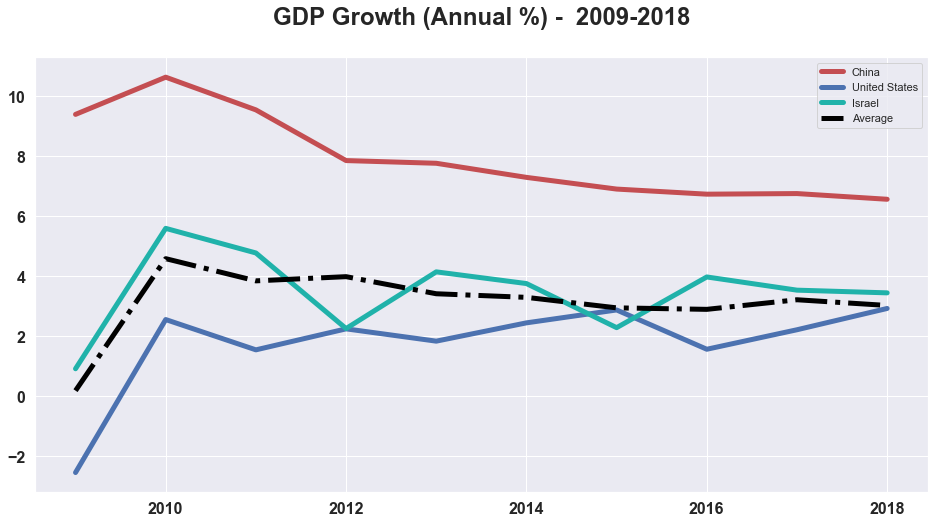

In [27]:
# Set figure size:
plt.figure(figsize = (16, 8))

# Graph color list:
graph_colors = ['r','b' ,'lightseagreen' ,'black']


# Plot graphs:
for i,x in enumerate(Xs1):
    
    # Plot each country:
    if country_graph1[i] != 'Average':
        plt.plot(y1,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-')
    
    # Plot "Average":
    else:
        plt.plot(y1,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-.')
    
# Graph title:
plt.title('GDP Growth (Annual %) -  2009-2018\n',
          fontsize = 24,
          fontweight = 'bold')

# Change ticks font:
plt.xticks(fontsize = 16, fontweight = 'bold')
plt.yticks(fontsize = 16, fontweight = 'bold')

# Add graph legend:
plt.legend(country_graph1)  


plt.show()

#### 2.3. GDP Growth Rate:

#### 2.3.1. Data Pre-processing:

In [28]:
# Create new "GDP per capita" dataframe:
GDP_capita = GDP_processed.copy()

# Keep GDP per capita values only:
GDP_capita = GDP_capita[GDP_capita['Series Name'] == GDP_indicators[1]]

# Remove unnecessary columns and reset index:
GDP_capita = GDP_capita.drop('Series Name', axis = 1)
GDP_capita.reset_index(drop = True, inplace = True)


# Change values' type to int64 and round values:
for i in range(len(col_list)):
    try:
        GDP_capita = GDP_capita.astype({col_list[i]: 'float64'}).round().astype({col_list[i]: 'int64'})
    
    except:
        continue
        
        
# Crate a list of mean values of each column:
mean_GDP_capita = pd.DataFrame(data = GDP_capita.mean(axis = 0).round(2))
mean_GDP_capita.reset_index(inplace = True)
mean_GDP_capita.rename(columns = {'index':'Year', 0:'Average'}, inplace = True)

# Remove null values
GDP_capita.dropna(axis = 0, inplace = True)


GDP_capita.head()

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,438,543,591,642,637,614,578,547,556,521
1,Albania,4114,4094,4437,4248,4413,4579,3953,4124,4533,5269
2,Algeria,3883,4481,5456,5592,5500,5493,4178,3946,4044,4115
3,American Samoa,11961,10271,10294,11569,11505,11507,11843,11697,10823,11467
4,Andorra,43339,39736,41101,38393,40627,42300,36040,37224,39134,42030


In [29]:
GDP_capita.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000
mean,12247.375527,12942.430380,14387.291139,14329.502110,14833.160338,15040.56962,13477.215190,13526.953586,14261.354430,15160.578059
std,18679.442065,19137.978077,21451.619280,20841.085285,21979.397909,22515.24579,19760.102206,19966.260962,20658.509389,22293.576604
min,212.000000,234.000000,250.000000,252.000000,257.000000,275.00000,306.000000,282.000000,293.000000,272.000000
25%,1349.000000,1553.000000,1738.000000,1820.000000,1966.000000,2030.00000,1996.000000,2049.000000,2001.000000,2036.000000
50%,4316.000000,4921.000000,5650.000000,6110.000000,6640.000000,6467.00000,5840.000000,5651.000000,6132.000000,6385.000000
75%,14514.000000,13924.000000,14637.000000,15435.000000,16007.000000,16489.00000,15614.000000,15198.000000,16078.000000,17130.000000
max,154762.000000,150585.000000,168786.000000,157516.000000,177593.000000,189171.00000,165938.000000,169916.000000,167102.000000,185741.000000


#### 2.3.2. Summary statistics:  
* From the minimum and maxium values of each year we can learn that there is a greate variation between countreis' GDP per capita.
* The mean GDP per capita does not vary much between each year.
* Regarding the standard deviations, we can see that they change between years but there is no trend.

In [30]:
print(\
'There is GDP/Capita data for {} countries.'\
      .format(GDP_capita.shape[0])
     )

There is GDP/Capita data for 237 countries.


#### 2.2.3. GDP per capita visualization:  
To visualize the GDP per capita rate data we will take three countries for example:
1. China
2. United States
3. Israel

In [31]:
# List of countries to visualize:
country_graph2 = ['China', 'United States', 'Israel']

# List of years:
y2 = list(range(2009,2019))

# Xs list to plot:
Xs2 = []

# Get example countries data and add to "Xs2":
for country in country_graph2:
    data = GDP_capita.loc[GDP_capita['Country'] == country].set_index('Country').transpose()
    x = data[country]
    Xs2.append(x)
    
# Add the average GDP per capita to the graph data:    
country_graph2.append('Average')
Xs2.append(mean_GDP_capita['Average'])

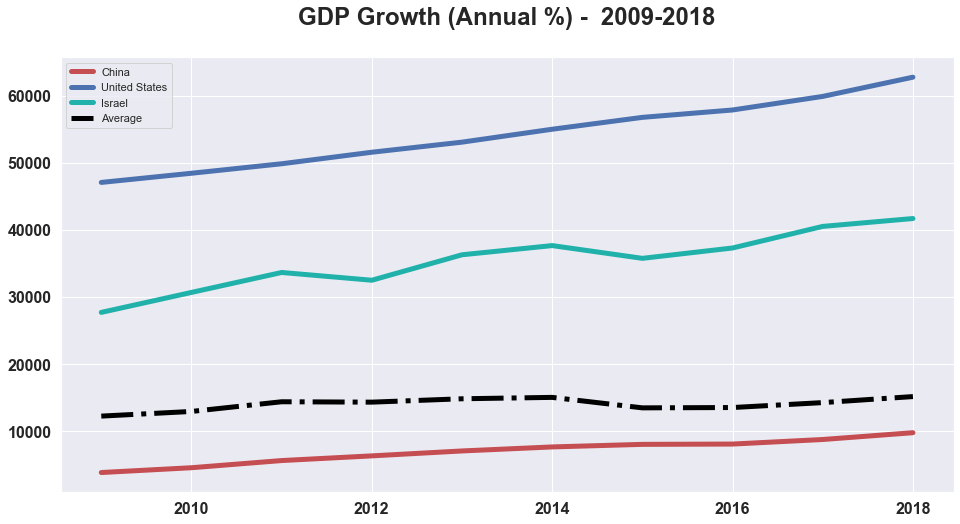

In [32]:
# Set figure size:
plt.figure(figsize = (16, 8))

# Graph color list:
graph_colors = ['r','b' ,'lightseagreen' ,'black']

# Plot graphs:
for i,x in enumerate(Xs2):
    
    # Plot each country:
    if country_graph2[i] != 'Average':
        plt.plot(y2,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-')
    
    # Plot "Average":
    else:
        plt.plot(y2,x,
                 color = graph_colors[i],
                 linewidth = 5,
                 linestyle = '-.')
        
# Graph title:
plt.title('GDP Growth (Annual %) -  2009-2018\n',
          fontsize = 24,
          fontweight = 'bold')

# Change ticks font:
plt.xticks(fontsize = 16, fontweight = 'bold')
plt.yticks(fontsize = 16, fontweight = 'bold')


# Add graph legend:
plt.legend(country_graph2)


plt.show()

### 3. Summary:

Overall, in this notebook we:
1. We have pre-processed three dataframe:  
    1) *__doing_business__*  
    2) *__GDP_growth__*  
    3) *__GDP_capita__* 
2. We used some simple graphs to visualize some of the data.

In [33]:
# Print a report of the three dataframes in this notebook:
print(\
'There are three dataframes to combine:\n\
  1) "doing_business" - total of {} countries\n\
  2) "GDP_growth"     - total of {} countries\n\
  3) "GDP_capita"     - total of {} countreis'\
.format(doing_business.shape[0], GDP_growth.shape[0], GDP_capita.shape[0])
     )

There are three dataframes to combine:
  1) "doing_business" - total of 191 countries
  2) "GDP_growth"     - total of 238 countries
  3) "GDP_capita"     - total of 237 countreis


Let's join between *__doing_business__* and *__GDP_growth__* and for future analysis.

In [34]:
# Join "doing_business" and "GDP_growth":
growth_db = doing_business.merge(GDP_growth, left_on = 'Country', right_on = 'Country')

Let's export the a csv of *__growth_db__* file for future snalysis.

In [35]:
growth_db.to_csv(r'GDP_Growth_DB.csv')

Let's join between *__doing_business__* and *__GDP_capita__* and for future analysis.

In [36]:
# Join "doing_business" and "GDP_capita":
GDP_capita_db = doing_business.merge(GDP_capita, left_on = 'Country', right_on = 'Country')

Let's export the a csv of *__GDP_capita_db__* file for future snalysis.

In [37]:
GDP_capita_db.to_csv(r'GDP_Capita_DB.csv')

__Thank you for taking your time to read through this!__

## 4. References

World Bank, Doing Business. (n.d.-a). *Doing Business Indicators [Data file]*. Retrieved from The World Bank: https://databank.worldbank.org/source/doing-business

World Bank, World Development Indicators. (n.d.-b). *GDP per capita (current US$) [Data File]*. Retrieved December 28, 2019, from The World Bank: https://databank.worldbank.org/source/world-development-indicators